The Zambian Kwacha has seen a great deal of movements against the Dollar over the past 10 years, the purpose of this notebook is to explore and analyse the movements in the exchange rates over that past ten years to gain insight in the currency movements. This analysis will solely focus on the movements between the Zambian Kwacha (ZMW) against the United states Dollar ($).

Currency exchange rate forecasting means predicting future fluctuations in the value of one currency against another. It involves the use of historical data, economic indicators, and mathematical models to make accurate predictions about the direction and magnitude of exchange rate movements. This portion of the project will be focused on changes in the exchange rate and the forecasting is in the next section.

The source of the data used for my analysis is from the Zambian Central bank:The Bank of Zambia- USD/ZMW exchange rates

The results of this analysis can be used by policy makers and investors to manage the exchange rate risk of conducting business in zambia

In [1]:
#import the relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

In [2]:
raw_data=pd.read_csv(r"C:\Users\Namukaba Katambo\Desktop\NK\Datasets for practice\DAILY_RATES 07312023.csv")
raw_data.head()

,DATE,TIME,BUYING RATE,MID RATE,SELLING RATE
0,1/2/2013,3:30:00 PM,5.24,5.250000,5.260000
1,1/2/2013,12:30:00 PM,5.217777778,5.227778,5.237778
2,1/2/2013,9:30:00 AM,5.161111111,5.171111,5.181111
3,1/3/2013,9:30:00 AM,5.259722222,5.269722,5.279722
4,1/3/2013,12:30:00 PM,5.238611111,5.248611,5.258611


In [3]:
#number of columns and rows
raw_data.shape

(7863, 5)

In [4]:
#creating a copy of the dataframe
data=raw_data.copy()

In [5]:
data.shape

(7863, 5)

In [6]:
#changing the text format of the column names
data.columns = data.columns.str.capitalize()

In [7]:
data.head()

,Date,Time,Buying rate,Mid rate,Selling rate
0,1/2/2013,3:30:00 PM,5.24,5.250000,5.260000
1,1/2/2013,12:30:00 PM,5.217777778,5.227778,5.237778
2,1/2/2013,9:30:00 AM,5.161111111,5.171111,5.181111
3,1/3/2013,9:30:00 AM,5.259722222,5.269722,5.279722
4,1/3/2013,12:30:00 PM,5.238611111,5.248611,5.258611


In [8]:
#Checking for missing values
data.isnull().sum()

Date            0
Time            0
Buying rate     0
Mid rate        0
Selling rate    0
dtype: int64

In [9]:
#viewing the data types in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7863 entries, 0 to 7862
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          7863 non-null   object 
 1   Time          7863 non-null   object 
 2   Buying rate   7863 non-null   object 
 3   Mid rate      7863 non-null   float64
 4   Selling rate  7863 non-null   float64
dtypes: float64(2), object(3)
memory usage: 307.3+ KB


In [10]:
#Checking the details of the numerical data base
data.describe()

,Mid rate,Selling rate
count,7863.000000,7863.000000
mean,12.253394,12.273164
std,5.095477,5.100362
min,5.171111,5.181111
25%,8.472222,8.482222
50%,10.989167,11.002778
75%,16.995266,17.020266
max,22.669275,22.694119


In [11]:
#changing the format of the date column and adding a month and year column for better analysis of the exchange rate movements
data["Date"] = pd.to_datetime(data["Date"], format = "%m/%d/%Y")
data['Year'] = data['Date'].dt.year
data["Month"] = data["Date"].dt.month
data.head()

,Date,Time,Buying rate,Mid rate,Selling rate,Year,Month
0,2013-01-02,3:30:00 PM,5.24,5.250000,5.260000,2013,1
1,2013-01-02,12:30:00 PM,5.217777778,5.227778,5.237778,2013,1
2,2013-01-02,9:30:00 AM,5.161111111,5.171111,5.181111,2013,1
3,2013-01-03,9:30:00 AM,5.259722222,5.269722,5.279722,2013,1
4,2013-01-03,12:30:00 PM,5.238611111,5.248611,5.258611,2013,1


Below graph shows the overrall exchange rate movements over the defined period(2013-2023)

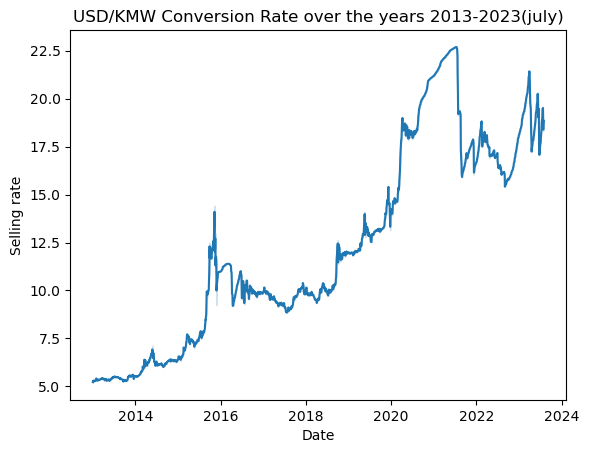

<Figure size 1200x600 with 0 Axes>

In [12]:
sns.lineplot(data=data, x="Date", y="Selling rate")
plt.title("USD/KMW Conversion Rate over the years 2013-2023(july)")
plt.figure(figsize=(12, 6))
plt.show()

The chart below will show the decomposition of exchange rates into seasonal, trend, and residual components.

      1.The trend component represents the long-term movement or the overall direction of the exchange rate. It shows the   underlying growth or decline in the exchange rate that is not attributable to seasonal or random fluctuations
      2.The seasonal component captures the regular and repeated patterns that occur at fixed intervals, such as monthly, quarterly, or yearly cycles
      3.The residual component, represents the unexplained variation in the data after accounting for the trend and seasonal components.

# Seasonal Decomposition

In [13]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(data['Selling rate'], model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

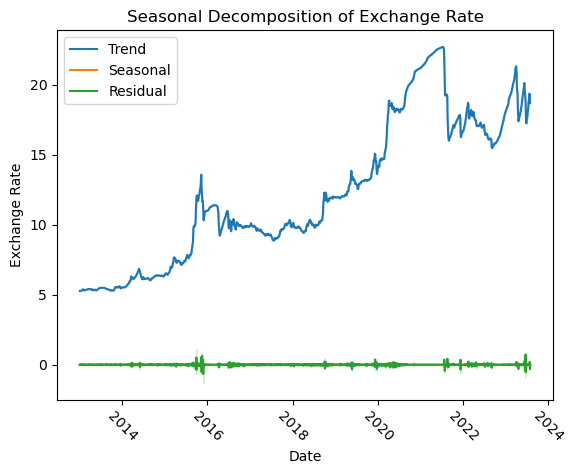

<Figure size 900x600 with 0 Axes>

In [14]:
sns.lineplot( x=data['Date'], y=trend, label='Trend')
sns.lineplot( x=data['Date'], y=seasonal, label='Seasonal')
sns.lineplot( x=data['Date'], y=residual, label='Residual')

plt.title('Seasonal Decomposition of Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.xticks(rotation=-45)
plt.figure(figsize=(9, 6))

plt.show()

-From the chart we can observe a general upward trend in the exchange rate meaning generally theres a depreciation of the kwacha against the dollar

-the seasonal component is not defined.

-There is a large residual component during certain periods suggesting that there are significant unpredictable movements in the exchange rate that are not accounted for by the trend and seasonality.

Calculating the percentage growth/change of the USD/ZMW over the past 10 years

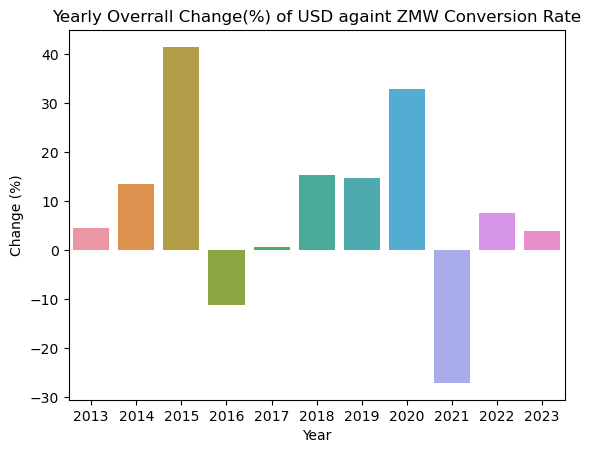

<Figure size 1500x900 with 0 Axes>

In [16]:
yearly_rate_change = data.groupby('Year').agg({'Selling rate': lambda x: (x.iloc[-1]-x.iloc[0])/x.iloc[-1]*100})

sns.barplot(data=data, x=yearly_rate_change.index, y=yearly_rate_change['Selling rate'])
plt.title("Yearly Overrall Change(%) of USD againt ZMW Conversion Rate")
plt.xlabel("Year")
plt.ylabel("Change (%)")
plt.figure(figsize=(15, 9))

plt.show()

### Observations from the above Chart are:

    1 2015 experineced the greatest loss in value of the kwacha depreciating an overrall 41%
    2 2016 the kwacha gained an overrall 11% in value
    3 through out 2017 and 2019 the kwacha lost value against the dollar with 2020 recording the second largest drop in value of 33%
    4 2021 saw largest gain in the exchange rate, with the kwacha appreciating an overrall 27%

In [17]:
# Calculate monthly growth
data['Growth'] = data.groupby(['Year', 'Month'])['Selling rate'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[-1] *100)

# Group data by Month and calculate average growth
grouped_data = data.groupby('Month').mean().reset_index()

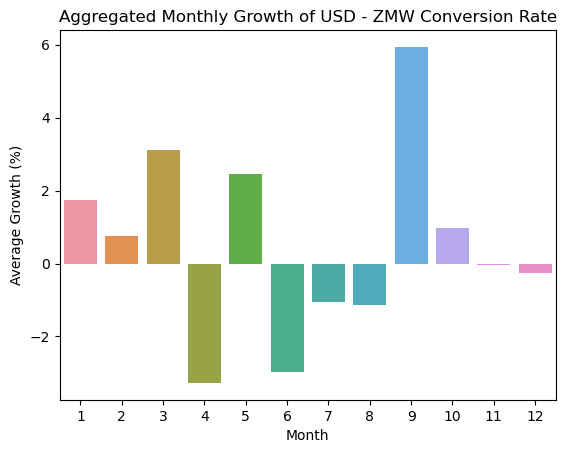

<Figure size 900x900 with 0 Axes>

In [18]:
sns.barplot(x=grouped_data['Month'], y=grouped_data['Growth'])
plt.title("Aggregated Monthly Growth of USD - ZMW Conversion Rate")
plt.xlabel("Month")
plt.ylabel("Average Growth (%)")
plt.figure(figsize=(9, 9))

plt.show()

From the graph above we can notice that on average the value of the USD is growing in the first quater of the year, drastically reduces in April and has a sharp increament in May. The USD has it greatest gain on avergae during the 3rd Quater of the year with record gains of about 7.13% on average in September. The last Quater of the years sees a steady decline in the value of the USD against the kwacha.  

In [19]:
#creating a dataframe of the averge USD/ZMW rates for further analysis
df= data.groupby(['Year', 'Month']).agg({'Selling rate': 'mean'})
df=df.reset_index()
# Pivot the table to have years as columns
df_pivot = df.pivot_table(index='Month', columns='Year', values='Selling rate')
df_pivot

Year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Month,,,,,,,,,,,
1,5.297792,5.532549,6.480154,11.138722,9.953333,9.882109,11.958134,14.438074,21.320744,17.288466,18.541824
2,5.341868,5.696115,6.759163,11.340276,9.787736,9.817583,11.943695,14.715672,21.614575,18.121685,19.430521
3,5.389263,6.098510,7.367764,11.354370,9.622815,9.610848,12.056956,16.547235,22.010959,17.959608,20.761374
4,5.369843,6.208556,7.402171,9.753113,9.468533,9.546208,12.329681,18.613328,22.239085,17.418853,18.478585
5,5.332128,6.627141,7.269625,10.067181,9.280600,10.115878,13.285192,18.249721,22.456836,17.114484,18.607818
6,5.427195,6.315078,7.340320,10.726582,9.278523,10.069474,13.078157,18.209666,22.605631,17.035664,18.757500
7,5.491058,6.158970,7.681049,9.926613,8.943723,9.913695,12.770145,18.177993,21.649682,16.448723,18.678168
8,5.434596,6.118421,8.103855,10.035591,9.043807,10.120057,13.059671,18.807848,18.093191,16.104730,NaN
9,5.341492,6.156435,10.209129,10.002178,9.419757,10.976490,13.165548,19.849005,16.398573,15.646951,NaN


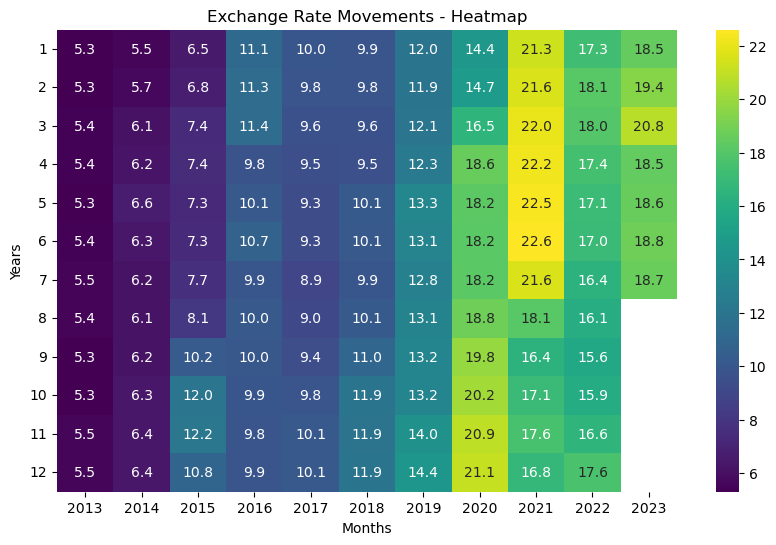

In [20]:
#creating a heat map showing the changes in exchange rates and the colors represent the magnitute of changes
plt.figure(figsize=(10, 6))
sns.heatmap(data=df_pivot, cmap='viridis', annot=True, fmt='0.1f')
plt.title('Exchange Rate Movements - Heatmap')
plt.xlabel('Months')
plt.ylabel('Years')
plt.yticks(rotation=0)

plt.show()

Showcasing the exchange rate movements over the years per year

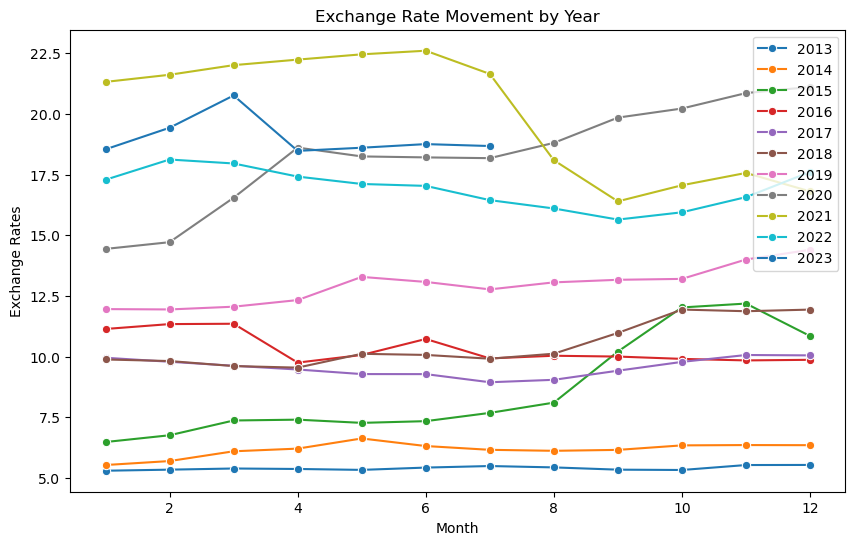

In [21]:
traces = []
plt.figure(figsize=(10, 6))
for year in df_pivot.columns:
    sns.lineplot(data=df_pivot[year], label=str(year), marker='o')
sns.lineplot(data=traces)
plt.title('Exchange Rate Movement by Year')
plt.xlabel('Month')
plt.ylabel('Exchange Rates')
#plt.xticks(rotation=45)
plt.show()